# 라이브러리 로드

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# 데이터셋 확인(Load and check data)

## Load data

In [4]:
# Load data
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Outlier detection

In [10]:
# Outlier detection

def detect_outliers(df, n, features):
    '''
    Tukey method를 이용해서 특정 샘플에 n개의 이상치값이 존재한다면,
    그에 대응하는 행 인덱스를 뽑아서 리스트안에 저장.
    '''
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        q3 = np.percentile(df[col], 75)
        # Interquartile range(IQR)
        IQR = q3 - q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [11]:
# detect outliers from Age, SibSp, Parch and Fare
Outliers_indices = detect_outliers(df_train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

In [13]:
df_train.loc[Outliers_indices] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


- 10개의 이상치 값이 존재
- 28, 89, 342는 Fare이 높음.
- 나머지 7개는 SibSp가 높음.

## check for null and missing values

In [21]:
# or df.info()
for col in df_train.columns:
    msg = 'column: {:>10}({})\t Percent of NaN value: {:.2f}% - (the number of NaN: {})'.format(col, df_train[col].dtype, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]), df_train[col].isnull().sum())
    print(msg)

column: PassengerId(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:   Survived(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:     Pclass(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:       Name(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:        Sex(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:        Age(float64)	 Percent of NaN value: 19.87% - (the number of NaN: 177)
column:      SibSp(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:      Parch(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:     Ticket(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:       Fare(float64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:      Cabin(object)	 Percent of NaN value: 77.10% - (the number of NaN: 687)
column:   Embarked(object)	 Percent of NaN value: 0.22% - (the number of NaN: 2)


In [22]:
# or df.info()
for col in df_test.columns:
    msg = 'column: {:>10}({})\t Percent of NaN value: {:.2f}% - (the number of NaN: {})'.format(col, df_test[col].dtype, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]), df_test[col].isnull().sum())
    print(msg)

column: PassengerId(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:     Pclass(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:       Name(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:        Sex(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:        Age(float64)	 Percent of NaN value: 20.57% - (the number of NaN: 86)
column:      SibSp(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:      Parch(int64)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:     Ticket(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)
column:       Fare(float64)	 Percent of NaN value: 0.24% - (the number of NaN: 1)
column:      Cabin(object)	 Percent of NaN value: 78.23% - (the number of NaN: 327)
column:   Embarked(object)	 Percent of NaN value: 0.00% - (the number of NaN: 0)


- 훈련 데이터 셋에서 Age(19.87%), Cabin(77.10%), Embarked(0.22%) 결측치가 존재.

- 테스트 데이터 셋에서 Age(20.57)%, Fare(0.24%), Cabin(78.23%) 결측치가 존재

- 이러한 결측치를 어떻게 처리해야할지 아이디어가 필요함. 처리할 방법이 생각나지 않는다면, 해당 feature를 제거하는 것도 한가지 방법이다.

# 탐색적 데이터 분석(Exploratory Data Analysis, EDA)

## How many Survived? (타겟 분포 확인)

- 이진분류 문제에서는 Target label이 어떤 분포로 이루어져 있는지 확인하는 것이 중요.

- 이에 따라서 어떻게 모델을 평가할지를 정하기 때문.

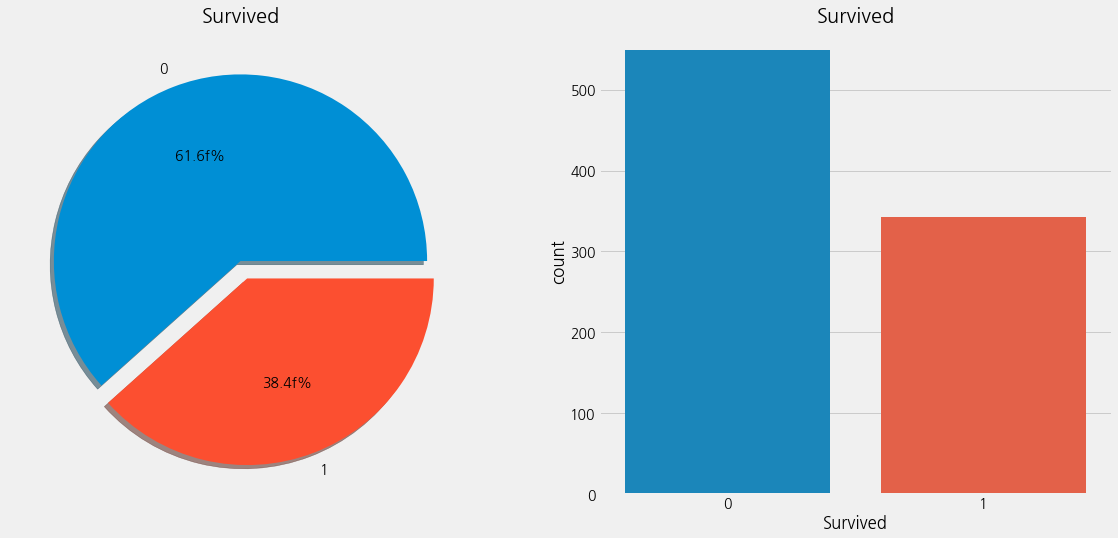

In [24]:
f, ax = plt.subplots(1, 2 ,figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1ff%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 생존한 사람보다 죽은 사람의 수가 많다는 것을 알 수 있음.

- 죽은 사람의 수는 541명(61.6%), 생존한 사람의 수는 350(38.4%).

- 3:2 비율도 어느정도 균일하다고 불 수 있음.

- 극단적으로 target의 분포가 치우쳐져 있을 때는 평가지표로 accuracy를 사용하는 것이 좋지 않음. (F1 score를 사용하는 것이 좋음). WHY? 모델이 치우쳐져있는 쪽으로 예측만 한다면, 모델의 성능은 무조건 좋기 때문.

## Types Of Features

독립변수는 크게 2가지로 분류할 수 있음.

- Categorical Features(범주형 변수)
- Numerical Features(수치형 변수)

**Categorical Features(범주형 변수)**의 경우, 그룹으로 나눌 수 있는 데이터를 말한다. 예시로 성별이 있다. 그리고 <U>데이터에 순서가 없는 범주형 데이터를 명목형 데이터(nomial data)</U>라고 부르고, 여기서는 Sex, Embarked가 이에 해당한다. 반대로 <U>데이터에 순서가 있는 범주형 데이터를 순위형 데이터(ordinal data)</U>라고 부르고, 여기서는 Pclass가 이에 해당한다.

**Numerical Features(수치형 변수)**의 경우, 실수값 또는 정수값을 가지고 있는 데이터를 말한다. 예시로 나이가 있다. 그리고 <U>최소값 또는 최댓값 사이에서 값을 연속적으로 가지고 있는 데이터를 연속형 데이터(continuous data)</U>라고 부르고, 여기서는 Age가 이에 해당한다. 반대로 <U>특정 기간에 측정된 데이터를 이산형 데이터(discrete data)</U>라고 부르고, 여기서는 SibSp, Parch가 이에 해당한다.

## Features analysis(독립변수 분석)

### Categorical values

#### Sex -> Nomial Feature

In [25]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

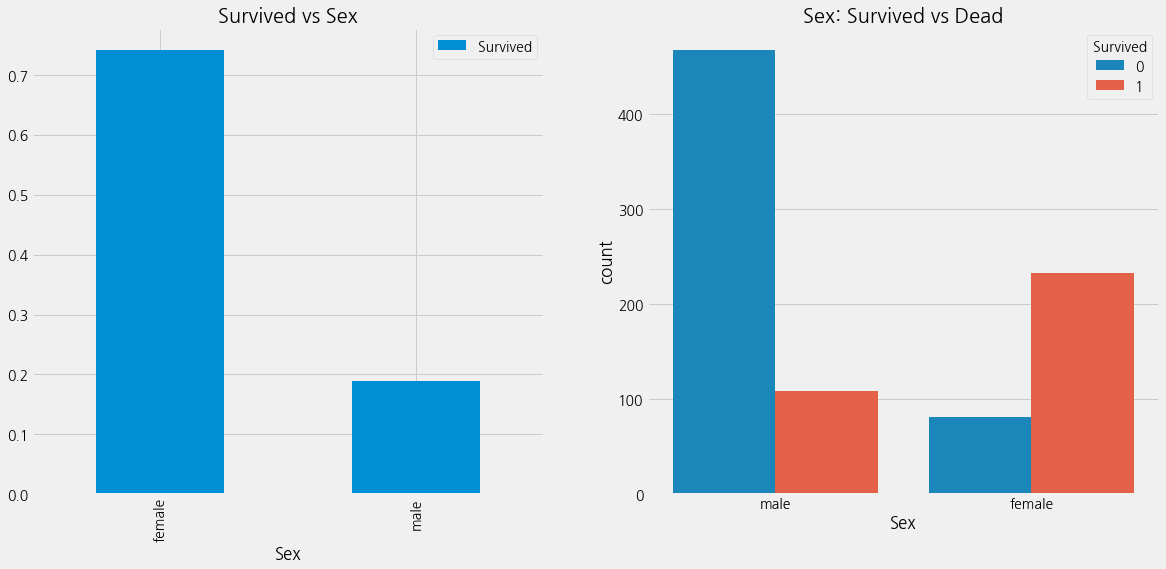

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [30]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 남성의 탑승객 수가 여성의 탑승객 수보다 많음.
- 여성의 생존율은 약 75%, 남성의 생존율은 약 19%. 여성의 생존율이 남성의 생존율보다 높음.


성별만으로 탑승객이 생존할지 죽을지를 어느정도 예측할 수 있기 때문에 Sex는 예측 모델에 사용될 중요한 독립변수(feature)라는 것을 알 수 있음.

#### Pclass -> Ordinal Feature

In [33]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


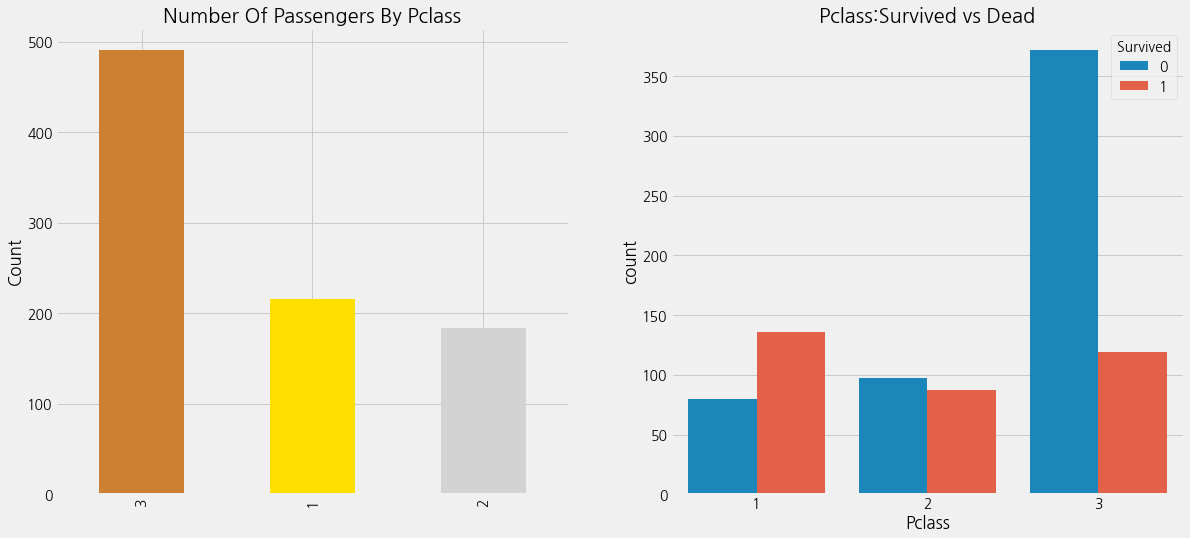

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 1등석에 탑승하고 있는 손님의 생존율이 높음.
- 3등석에 탑승하고 있는 손님이 압도적으로 많지만, 생존율은 25%.
- 그에 반면, 1등석의 경우 63%, 2등석의 경우 48%.

돈이 많은 승객의 경우, 생존율이 높은 것이 아닐까? 라는 생각을 할 수 있음.

#### Both Sex and Pclass

- 한 가지 독립 변수를 가지고 종속변수가 어떻게 달라지는지 확인하는 것도 중요하지만, 여러 개의 독립변수를 가지고 종속변수에 어떤 영향을 끼치는지 알아보는 것도 중요.

- 여기서는 Sex, Pclass 2가지를 이용해서 생존율이 어떻게 달라지는지 확인.

In [37]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

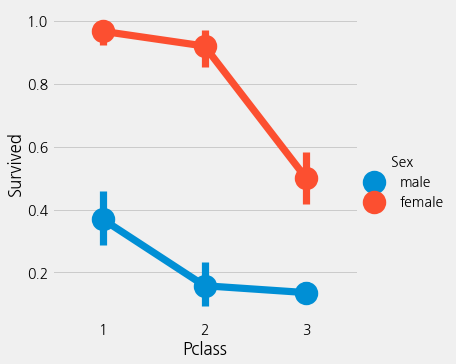

In [43]:
sns.catplot('Pclass', 'Survived', hue='Sex', data=df_train, kind='point')
plt.show()

- 위의 그래프를 통해서, 1등석에 탑승한 여성의 경우 95%~96% 정도의 생존율을 보이고, 94명중 3명만 사망.

- Pclass에 관계없이 생존율은 여성이 높음. (여성 우대 정책 때문에 여성의 생존율 높다는 것을 알 수 있음)

#### Embarked -> Nomial Feature

In [44]:
pd.crosstab([df_train.Embarked, df_train.Pclass], [df_train.Sex, df_train.Survived], margins=True).style.background_gradient(cmap='summer_r')

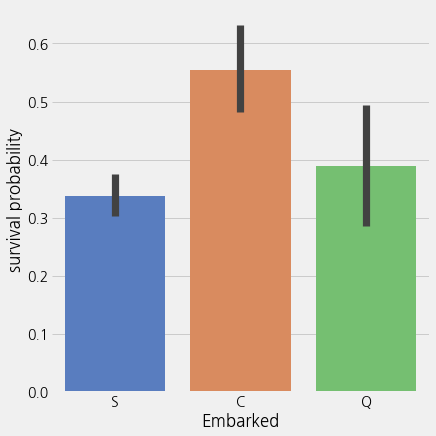

In [49]:
# Explore Embarked vs Survived
g = sns.catplot(x='Embarked', y='Survived', data=df_train, height=6, kind='bar', palette='muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')

- 항구 C가 생존율이 가장 높고, 항구 S가 생존율이 가장 낮다는 것을 알 수 있음. (왜 그럴까?)

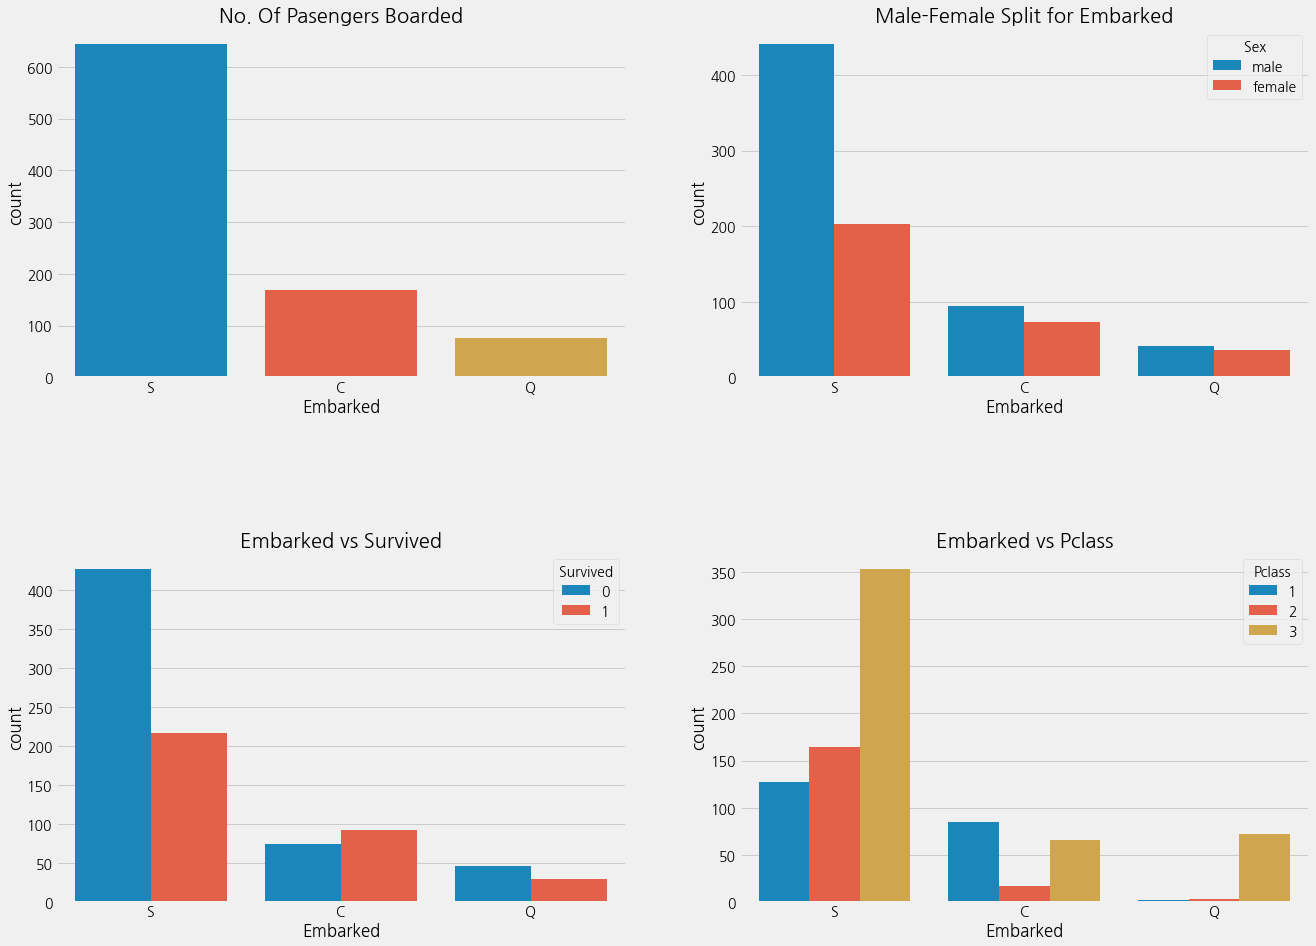

In [51]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Pasengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 항구 S에서 가장 많이 탑승했고, 대다수가 3등석 탑승객임.

- 항구 C의 탑승객은 대다수가 1등석 탑승객임. 그리고 생존율이 좋음. (돈이 많아서???)

- 항구 S에서도 1등석 탑승객이 많았지만, 3등석 탑승객이 그것보다 훨씬 많아서 생존율이 낮음. WHY? 3등석 탑승객은 19% 밖에 생존하지 못했기 때문.

- 항구 Q는 대부분 승객이 3등석 탑승객임.

- Figure(1) : 전체적으로 보면, 항구 S에서 가장 많은 사람이 탑승했다는 것을 알 수 있음.

- Figure(2) : 항구 C와 항구 Q는 남녀의 비율이 비슷하고, 항구 S는 남자가 더 많음.

- Figure(3) : 항구 C와 항구 Q는 항구 S에 비해 생존율이 높음.

- Figure(4) : 항구 C의 생존율이 높은 이유는 1등석, 2등석 손님이 많아서임을 알 수 있음. 반면 항구 S는 3등석 손님이 1등석, 2등석 손님보다 훨씬 많아서 생존율이 낮다는 것을 알 수 있음.

-> 돈이 생존율과 관련 있을까??

### Numerical values

#### SibSp -> Discrete Feature

- SibSp = Sibling + Spouse

-> Sibling: 형제, 자매, 의봇형제, 의봇자매

-> Spouse: 남편, 아내

In [52]:
pd.crosstab([df_train.SibSp], df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


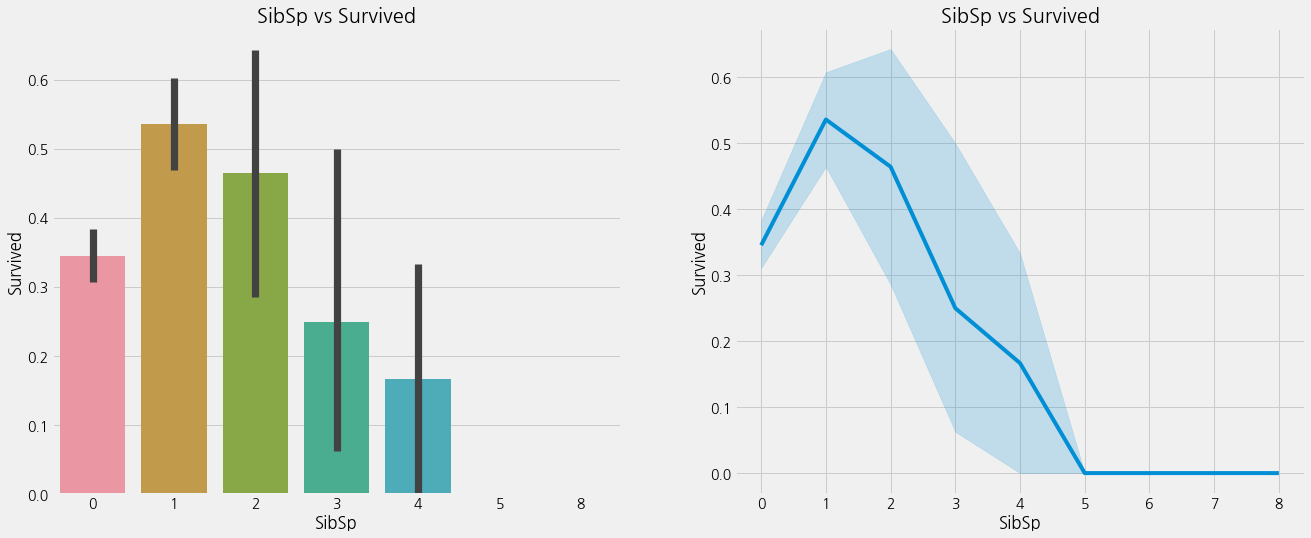

In [53]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=df_train, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.lineplot('SibSp', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [55]:
pd.crosstab(df_train.SibSp, df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 혼자 탑승할 경우, 생존율은 34.5%

- 1~2명 정도의 동반자가 있다면, 생존율은 50%

- 동반자가 많아질수록 생존율이 떨어짐.

-> 가족이 많으면 많을수록, 가족을 찾는데 걸리는 시간이 많아지기 때문에 생존율이 낮다고 예상할 수 있음.

-> 5~8명의 동반자가 있는 경우에는 생존율이 0%임. WHY? 해당 탑승객들은 3등석 탑승객이었고, 3등석에 타고있는 대가족이 모두 죽었음을 의미함.

#### Parch -> Discrete Feature

- Parch = Parent + Child

-> Parent: 부모님

-> Child: 자식

In [58]:
pd.crosstab(df_train.Parch, df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


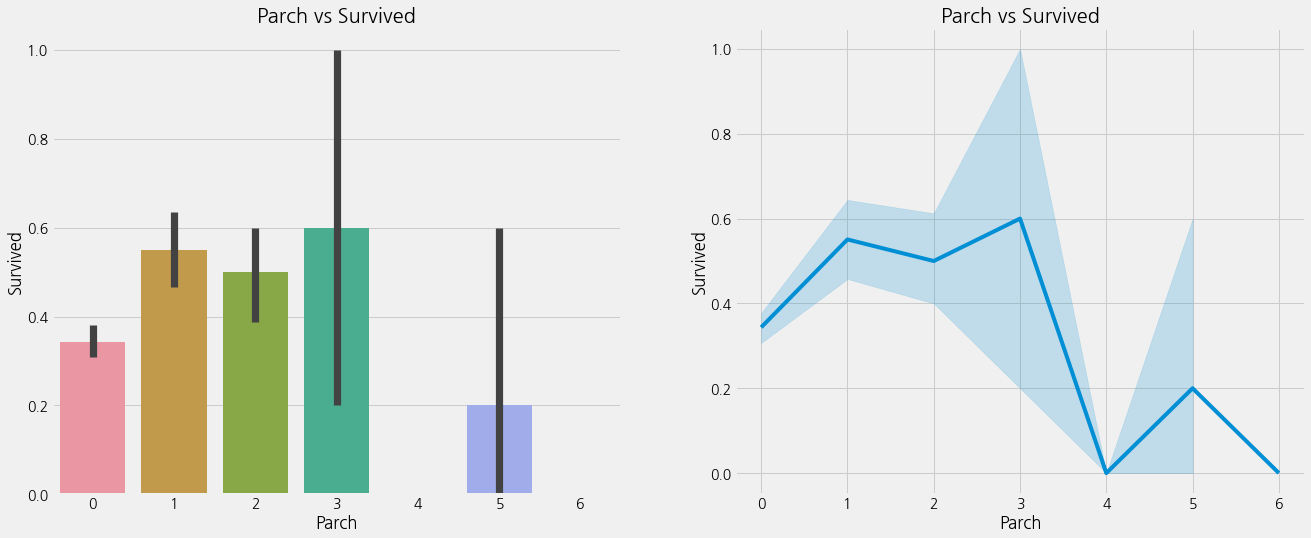

In [59]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=df_train, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.lineplot('Parch', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

- 1~3명 정도의 동반자가 있다면, 생존율이 좋음.

- SibSp와 마찬가지로 동반자가 많아질수록 생존율이 떨어짐.

#### Age -> Continous Feature

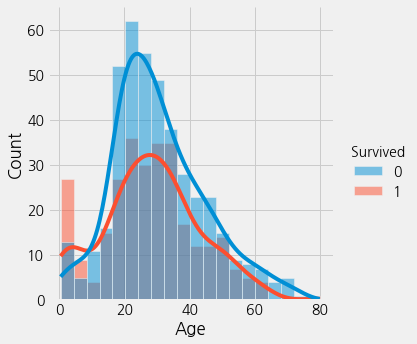

In [61]:
# Explore Age vs Survived

sns.displot(data=df_train, x='Age', hue='Survived', kind='hist', kde=True)
plt.show()

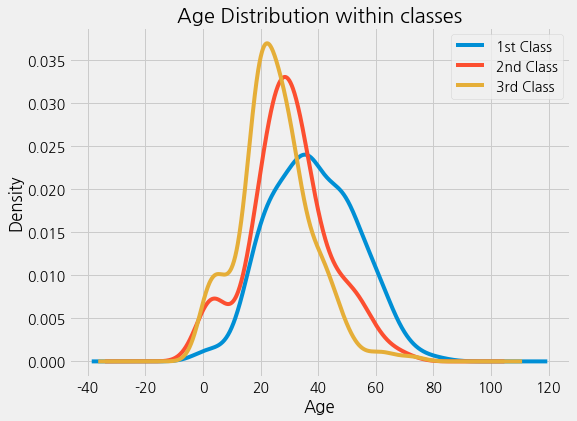

In [62]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Age는 tailed distribution의 형태를 띄고 있다. tailed distribtuion은 정규분포에 비해 극한 상황에서의 확률이 더 높은 분포를 말한다.

- 생존한 집단과 생존하지 않은 집단간의 연령 분포가 동일하지 않음. (Age가 아주 어릴때)

- 젊은 사람들의 생존율이 높고, 나이 많은 사람들은 생존율이 낮음.

- 그리고 아주 어린 승객의 경우, 생존율이 다른 나이대에 비해 상대적으로 높음.

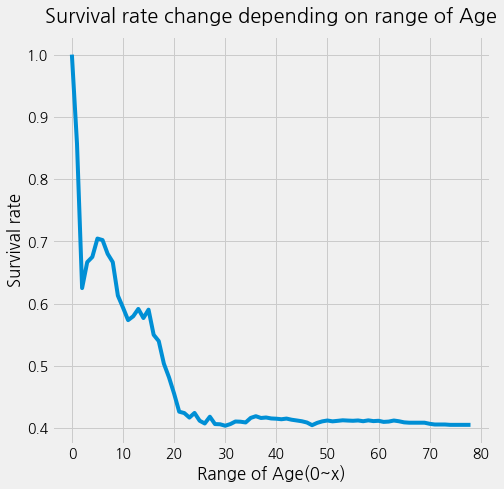

In [63]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존율이 높다는 것을 알 수 있음.

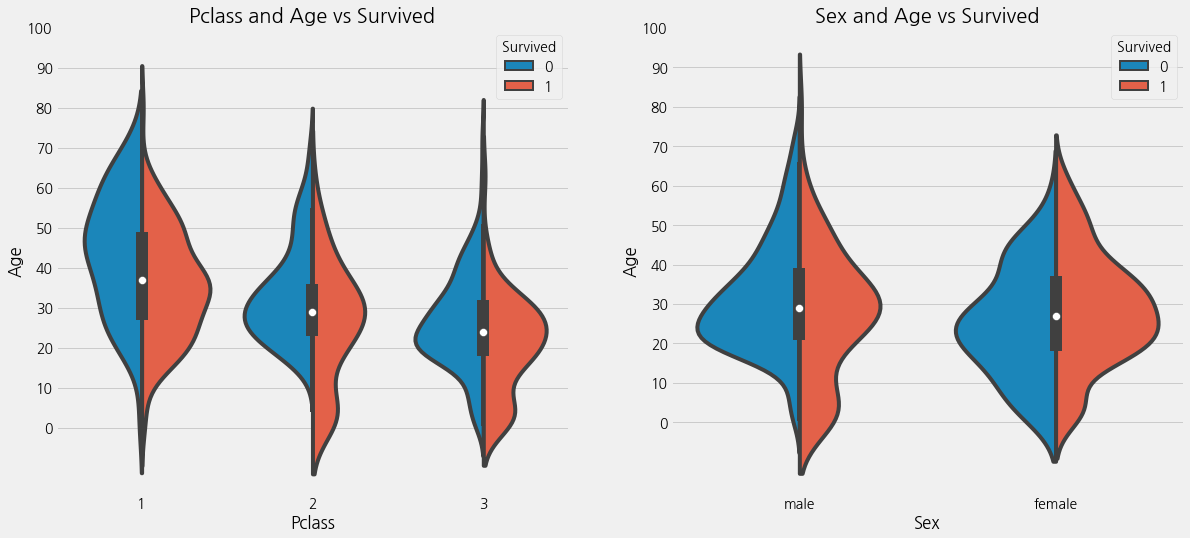

In [65]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Fare -> Continuous Feature

In [66]:
print('Highest Fare was:', df_train['Fare'].max())
print('Lowest Fare was:', df_train['Fare'].min())
print('Average Fare was:', df_train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


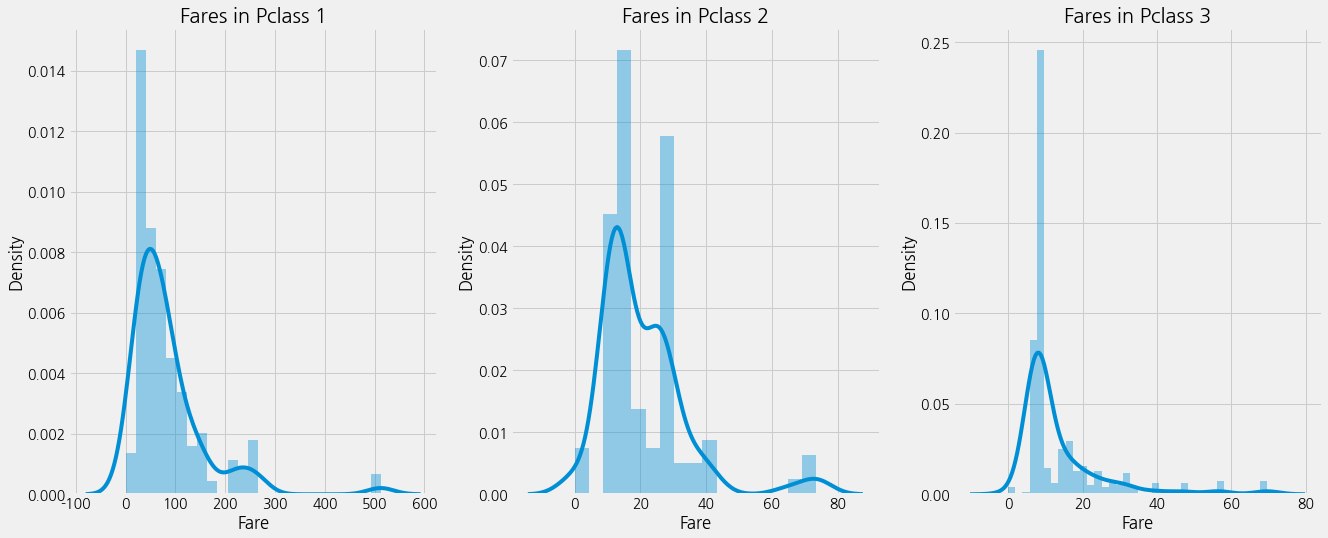

In [68]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(df_train[df_train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(df_train[df_train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(df_train[df_train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

- Pclass 1의 경우, 다른 Pclass보다 Fare가 높다는 것을 알 수 있음.

- 하위 분포를 본다면, 정규분포 형태를 띄고 있지만, 전체적으로 보면 비대칭 분포를 띄고 있음.

- Fare는 continuous Feature이기 떄문에 discrete Feature로 변환할 수도 있음.

- information loss가 발생할 수 있지만, 때에 따라서는 도움이 됨.

### Etc

#### Name

- 승객의 이름 정보를 알 수 있음.

In [69]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### Cabin

- 승객의 객실 위치를 알 수 있음.

- 결측치값의 비율이 80%

In [70]:
df_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

#### Ticket

- 예약할 때, 언제 탑승하고, 어디서 탑승하고, 객실은 어디인지에 대한 정보를 나타내는 예약번호를 가지고 있다고 추측할 수 있음.

In [71]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

## Observation in a Nutshell for all features

- Sex

여성이 남성보다 생존율이 높음.

- Pclass

1등석 승객이 생존율이 높음. 3등급 승객은 생존율이 낮음. 여성의 경우 Pclass의 상관없이 생존율이 높음.

- Age

5-10 정도의 어린아이의 생존율이 높음. 15-35 사이의 승객이 가장 많이 사망.

- Embarked

항구 C에서 탑승한 손님들이 생존율이 높음. 항구 C에서 탑승한 대다수의 승객이 1등급 손님이라서 생존율이 높은 것 같음.

- Parch + SibSp

1-2명의 형제, 자매, 배우자, 또는 1-3명의 부모님, 자식과 같이 탑승한 손님의 경우 생존율이 높음. 반면 혼자이거나 대가족의 경우 생존율이 낮음.

## Correlation Between The Features

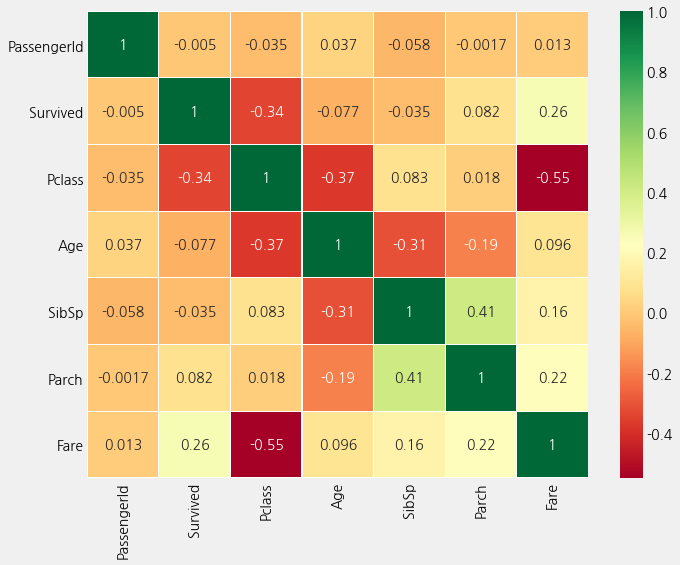

In [72]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 양의 상관 관계

A의 증가가 B의 증가로 이어지는 경우 양의 상관 관계. 1일 경우 완전 일치를 의미함.

- 음의 상관 관계

A의 감소가 B의 감소로 이어지는 경우 음의 상관 관계. -1일 경우 완전 일치를 의미함.

<br>

상관관계가 크면 클수록, 그것들에서 뽑을 수 있는 정보가 거의 동일하다는 것을 의미함.

따라서 모델의 무게를 줄이기 위해서 상관관계가 매우 큰 경우에는 featue selection을 통해서 제거할 필요가 있음.